In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [288]:
pd.set_option('precision', 3)


# Read dataset

In [270]:
df = pd.read_csv('./data.csv')
useful_columns = set(list(filter(lambda name: 'mean'  in name, df.columns)) + ['id', 'diagnosis'])
df = df.drop(list(filter(lambda name: name not in useful_columns, df.columns)), 1)
mapper = {"M": 1, 'B':0}

df['diagnosis'] = df['diagnosis'].apply(lambda x: mapper[x])

In [289]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079
1,842517,1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057
2,84300903,1,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060
3,84348301,1,11.42,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097
4,84358402,1,20.29,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059


# KMeans Clustering

In [272]:
from sklearn.cluster import KMeans

In [273]:
kmeans_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean']
kmeans_df = df[['diagnosis'] + kmeans_features]


In [274]:
def getBestKMeans(X, n_clusters, n_trials=10): 
    best_kmeans = None
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    for _ in range(n_trials):
        rnd_seed = np.random.randint(0, 10**6)
        kmeans = KMeans(n_clusters=n_clusters, init='random', random_state=rnd_seed)
        kmeans.fit(X_scaled)
        if best_kmeans is None or kmeans.inertia_ < best_kmeans.inertia_:
            best_kmeans = kmeans
    return best_kmeans
        
    

## K = 2

In [290]:
kmeans = getBestKMeans(kmeans_df.drop(['diagnosis'], 1), 2)


In [291]:
kmeans_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,569.000,569.000,569.000,569.000,569.000,569.000
mean,0.373,14.127,19.290,91.969,0.096,0.089
std,0.484,3.524,4.301,24.299,0.014,0.080
min,0.000,6.981,9.710,43.790,0.053,0.000
25%,0.000,11.700,16.170,75.170,0.086,0.030
50%,0.000,13.370,18.840,86.240,0.096,0.062
75%,1.000,15.780,21.800,104.100,0.105,0.131
max,1.000,28.110,39.280,188.500,0.163,0.427


In [292]:
kmeans_df[kmeans.labels_ == 0].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,405.000,405.000,405.000,405.000,405.000,405.000
mean,0.123,12.407,18.265,79.867,0.093,0.050
std,0.329,1.881,3.995,12.489,0.013,0.040
min,0.000,6.981,9.710,43.790,0.053,0.000
25%,0.000,11.260,15.510,71.900,0.084,0.023
50%,0.000,12.400,17.890,79.470,0.092,0.041
75%,0.000,13.650,20.280,88.060,0.101,0.068
max,1.000,17.850,33.810,114.600,0.163,0.313


In [293]:
kmeans_df[kmeans.labels_ == 1].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,164.000,164.000,164.000,164.000,164.000,164.000
mean,0.988,18.376,21.821,121.856,0.104,0.185
std,0.110,2.999,3.982,20.204,0.013,0.072
min,0.000,9.731,10.380,63.780,0.074,0.057
25%,1.000,16.247,19.503,108.250,0.095,0.135
50%,1.000,18.455,21.575,121.200,0.104,0.169
75%,1.000,20.180,23.973,132.900,0.112,0.219
max,1.000,28.110,39.280,188.500,0.145,0.427


## K = 5

In [294]:
kmeans = getBestKMeans(kmeans_df.drop(['diagnosis'], 1), 5)


In [296]:
kmeans_df[kmeans.labels_ == 0].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,43.0,43.000,43.000,43.000,43.000,43.000
mean,1.0,21.030,21.527,141.460,0.112,0.267
std,0.0,3.012,3.797,20.257,0.011,0.064
min,1.0,15.320,10.380,103.200,0.093,0.168
25%,1.0,19.560,19.380,129.750,0.106,0.221
50%,1.0,20.590,21.510,138.900,0.111,0.245
75%,1.0,22.680,24.125,152.450,0.117,0.318
max,1.0,28.110,29.330,188.500,0.145,0.427


In [297]:
kmeans_df[kmeans.labels_ == 1].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,173.000,173.000,173.000,173.000,173.000,173.000
mean,0.023,12.557,16.121,80.378,0.086,0.034
std,0.151,1.708,2.259,11.296,0.008,0.026
min,0.000,8.196,9.710,51.710,0.064,0.000
25%,0.000,11.460,14.690,73.340,0.081,0.017
50%,0.000,12.560,16.210,80.450,0.086,0.029
75%,0.000,13.680,18.030,88.060,0.091,0.045
max,1.000,17.850,19.890,114.600,0.100,0.137


In [298]:
kmeans_df[kmeans.labels_ == 2].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,143.000,143.000,143.000,143.000,143.000,143.000
mean,0.196,11.812,17.365,76.709,0.109,0.078
std,0.398,1.759,2.818,11.920,0.011,0.062
min,0.000,6.981,10.890,43.790,0.091,0.000
25%,0.000,10.500,15.395,68.065,0.101,0.038
50%,0.000,11.750,17.480,76.200,0.107,0.062
75%,0.000,13.065,19.320,85.805,0.113,0.100
max,1.000,15.730,24.440,102.800,0.163,0.411


In [299]:
kmeans_df[kmeans.labels_ == 3].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,127.000,127.000,127.000,127.000,127.000,127.000
mean,0.969,17.551,21.900,115.484,0.099,0.143
std,0.175,2.048,3.870,13.009,0.010,0.045
min,0.000,13.730,14.260,92.330,0.074,0.029
25%,1.000,15.940,19.580,104.600,0.092,0.112
50%,1.000,17.540,21.530,115.000,0.098,0.142
75%,1.000,19.175,23.415,126.400,0.105,0.170
max,1.000,23.270,39.280,152.100,0.118,0.300


In [300]:
kmeans_df[kmeans.labels_ == 4].describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,83.000,83.000,83.000,83.000,83.000,83.000
mean,0.169,12.574,24.058,80.800,0.085,0.045
std,0.377,1.821,3.073,12.220,0.009,0.031
min,0.000,7.691,19.960,47.920,0.053,0.000
25%,0.000,11.555,21.590,74.375,0.080,0.024
50%,0.000,12.770,23.230,82.010,0.086,0.040
75%,0.000,13.685,25.465,88.295,0.092,0.062
max,1.000,16.690,33.810,107.100,0.103,0.112


## K = 10

In [301]:
kmeans = getBestKMeans(kmeans_df.drop(['diagnosis'], 1), 10)


In [302]:
kmeans_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,569.000,569.000,569.000,569.000,569.000,569.000
mean,0.373,14.127,19.290,91.969,0.096,0.089
std,0.484,3.524,4.301,24.299,0.014,0.080
min,0.000,6.981,9.710,43.790,0.053,0.000
25%,0.000,11.700,16.170,75.170,0.086,0.030
50%,0.000,13.370,18.840,86.240,0.096,0.062
75%,1.000,15.780,21.800,104.100,0.105,0.131
max,1.000,28.110,39.280,188.500,0.163,0.427


In [303]:
kmeans_df[kmeans.labels_ == 0].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,51.000,51.000,51.000,51.000,51.000,51.000
mean,0.941,14.816,20.686,98.757,0.114,0.193
std,0.238,1.790,3.030,12.112,0.010,0.059
min,0.000,9.029,11.890,58.790,0.078,0.113
25%,1.000,13.900,19.150,92.965,0.107,0.151
50%,1.000,14.950,21.000,100.400,0.113,0.180
75%,1.000,15.955,22.760,107.050,0.117,0.213
max,1.000,18.220,27.540,120.300,0.142,0.411


In [304]:
kmeans_df[kmeans.labels_ == 1].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,55.000,55.000,55.000,55.000,55.000,55.000
mean,0.109,14.341,15.296,92.854,0.095,0.062
std,0.315,1.210,1.825,8.038,0.007,0.032
min,0.000,12.320,10.890,78.850,0.078,0.011
25%,0.000,13.505,13.955,87.350,0.092,0.039
50%,0.000,14.420,15.510,93.860,0.097,0.057
75%,0.000,15.020,16.610,97.910,0.099,0.078
max,1.000,17.850,18.680,114.600,0.110,0.154


In [305]:
kmeans_df[kmeans.labels_ == 2].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,35.000,35.000,35.000,35.000,35.000,35.000
mean,0.029,11.598,26.247,73.933,0.080,0.031
std,0.169,1.829,3.155,12.153,0.009,0.030
min,0.000,7.691,21.280,47.920,0.053,0.000
25%,0.000,10.725,24.090,68.260,0.075,0.009
50%,0.000,11.870,26.990,76.770,0.081,0.024
75%,0.000,12.940,28.220,82.255,0.086,0.044
max,1.000,15.130,33.810,96.710,0.097,0.110


In [306]:
kmeans_df[kmeans.labels_ == 3].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,77.000,77.000,77.000,77.000,77.000,77.000
mean,0.403,13.883,21.610,89.932,0.091,0.070
std,0.494,1.421,2.008,9.246,0.007,0.038
min,0.000,10.570,18.770,70.150,0.074,0.013
25%,0.000,12.850,20.130,82.630,0.086,0.041
50%,0.000,13.850,21.410,89.460,0.091,0.061
75%,1.000,14.950,22.680,96.120,0.096,0.099
max,1.000,17.350,27.150,111.000,0.104,0.228


In [307]:
kmeans_df[kmeans.labels_ == 4].describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,48.000,48.000,48.000,48.000,48.000,48.000
mean,0.167,12.097,17.137,78.797,0.116,0.075
std,0.377,1.336,2.811,8.836,0.010,0.037
min,0.000,8.598,10.940,54.660,0.104,0.012
25%,0.000,11.570,15.397,74.725,0.109,0.045
50%,0.000,11.925,17.240,78.020,0.114,0.070
75%,0.000,13.012,18.770,84.610,0.122,0.098
max,1.000,15.100,24.440,99.580,0.163,0.169


In [308]:
kmeans_df[kmeans.labels_ == 5].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,31.0,31.000,31.000,31.000,31.000,31.000
mean,1.0,21.869,21.704,147.329,0.113,0.282
std,0.0,2.696,3.522,18.460,0.010,0.064
min,1.0,17.910,10.380,122.800,0.094,0.197
25%,1.0,20.135,19.745,134.250,0.107,0.230
50%,1.0,20.940,21.510,142.700,0.111,0.257
75%,1.0,23.400,23.915,157.000,0.116,0.327
max,1.0,28.110,29.330,188.500,0.145,0.427


In [309]:
kmeans_df[kmeans.labels_ == 6].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,80.000,80.000,80.000,80.000,80.000,80.000
mean,0.013,10.467,16.761,67.066,0.100,0.039
std,0.112,1.162,2.682,7.670,0.006,0.035
min,0.000,6.981,9.710,43.790,0.086,0.000
25%,0.000,9.742,14.918,61.822,0.096,0.020
50%,0.000,10.485,17.090,66.855,0.100,0.030
75%,0.000,11.415,18.600,73.295,0.104,0.049
max,1.000,12.670,23.090,81.250,0.117,0.198


In [310]:
kmeans_df[kmeans.labels_ == 7].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,55.0,55.000,55.000,55.000,55.000,55.000
mean,1.0,19.089,19.775,124.855,0.094,0.127
std,0.0,1.506,2.271,9.959,0.008,0.034
min,1.0,16.460,14.340,109.300,0.074,0.057
25%,1.0,18.040,18.350,118.100,0.089,0.105
50%,1.0,18.810,20.110,123.400,0.094,0.120
75%,1.0,20.210,21.635,131.750,0.100,0.151
max,1.0,23.270,24.480,152.100,0.110,0.198


In [311]:
kmeans_df[kmeans.labels_ == 8].describe()



,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,31.0,31.000,31.000,31.000,31.000,31.000
mean,1.0,18.673,27.042,123.623,0.098,0.174
std,0.0,1.695,3.459,11.144,0.008,0.040
min,1.0,15.220,23.210,103.400,0.083,0.093
25%,1.0,17.440,24.805,114.350,0.093,0.149
50%,1.0,19.100,26.470,127.700,0.099,0.170
75%,1.0,19.570,28.055,130.800,0.102,0.200
max,1.0,23.210,39.280,153.500,0.121,0.255


In [312]:
kmeans_df[kmeans.labels_ == 9].describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean
count,106.0,106.000,106.000,106.000,106.000,106.000
mean,0.0,12.212,16.365,77.928,0.082,0.028
std,0.0,1.249,2.164,8.118,0.006,0.022
min,0.0,8.878,10.720,56.360,0.064,0.000
25%,0.0,11.463,14.935,73.618,0.078,0.014
50%,0.0,12.300,16.620,78.505,0.083,0.024
75%,0.0,13.133,18.060,84.078,0.087,0.037
max,0.0,14.610,20.540,92.680,0.093,0.112


# SVD/PCA 

In [109]:
from sklearn.preprocessing import MinMaxScaler
from scipy.linalg import svd


In [119]:
def get_pc_contributions(X):
    data_scatter = (X ** 2).sum()
    Z, Mu, C = svd(X, full_matrices=False)
    abs_contr = Mu ** 2
    rel_contr = abs_contr / data_scatter * 100
    df = pd.DataFrame(np.column_stack((abs_contr, rel_contr)), columns=['natural_contributions', 'per_cent_contributions'])
    return df, data_scatter


In [131]:
svd_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'concavity_mean']
svd_df = df[svd_features]
svd_extended_df = df[['diagnosis'] + svd_features]


In [315]:

contribs, ds = get_pc_contributions(StandardScaler().fit_transform(svd_df)) 
print('Data Scatter: {}'.format(ds))
contribs
    
    

Data Scatter: 2845.0


,natural_contributions,per_cent_contributions
0,1647.593,57.912
1,625.461,21.985
2,434.019,15.256
3,137.584,4.836
4,0.341,0.012


In [314]:

contribs, ds = get_pc_contributions(MinMaxScaler().fit_transform(svd_df)) 
print('Data Scatter: {}'.format(ds))
contribs
    
    

Data Scatter: 373.99814234999593


,natural_contributions,per_cent_contributions
0,338.259,90.444
1,16.167,4.323
2,12.225,3.269
3,7.336,1.962
4,0.011,0.003


Первая компонента объясняет почти весь датасет

In [126]:
def compute_hidden_ranking_factor(scaled_df):
    Z, Mu, C = svd(scaled_df, full_matrices=False)
    alpha = 1 / (-C[0]).sum()
    ranks = scaled_df @ (-C[0]) * alpha
    return ranks


In [127]:
hrf = compute_hidden_ranking_factor(MinMaxScaler(feature_range=(0, 100)).fit_transform(df))


In [132]:
svd_extended_df['hrf'] = hrf


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
hrf_argsort = np.argsort(hrf)

In [139]:
svd_extended_df.iloc[hrf_argsort[:10]]

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,hrf
568,0,7.760,24.54,47.92,0.05263,0.000000,9.555226
159,0,10.900,12.96,68.69,0.07515,0.003090,10.903297
307,0,9.000,14.40,56.36,0.07005,0.003681,11.843009
192,0,9.720,18.22,60.73,0.06950,0.000000,12.023961
144,0,10.750,14.97,68.26,0.07793,0.022510,12.030636
287,0,12.890,13.12,81.89,0.06955,0.022600,12.420949
308,0,13.500,12.71,85.69,0.07376,0.002758,12.520246
296,0,10.910,12.35,69.14,0.08518,0.012360,12.814544
175,0,8.671,14.45,54.42,0.09138,0.000000,13.103568
178,0,13.010,22.22,82.01,0.06251,0.001595,13.118337


In [140]:
svd_extended_df.iloc[hrf_argsort[-10:]]

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,concavity_mean,hrf
181,1,21.09,26.57,142.7,0.1141,0.2487,68.029894
202,1,23.29,26.67,158.9,0.1141,0.3523,68.953447
180,1,27.22,21.87,182.1,0.1094,0.2871,68.977089
352,1,25.73,17.46,174.2,0.1149,0.3368,69.641779
567,1,20.60,29.33,140.1,0.1178,0.3514,69.735174
82,1,25.22,24.91,171.5,0.1063,0.3339,70.928940
108,1,22.27,19.67,152.8,0.1326,0.4264,73.905315
461,1,27.42,26.27,186.9,0.1084,0.3635,73.962207
78,1,20.18,23.97,143.7,0.1286,0.3754,75.750448
122,1,24.25,20.20,166.2,0.1447,0.4268,78.986387


In [171]:
 class RangeNormalizer:
    def fit_transform(this, X):
        mean_values = X.mean(axis=0)
        max_values = X.max(axis=0) 
        min_values = X.min(axis=0)
        return (X - mean_values) / (max_values - min_values)


In [141]:
from sklearn.decomposition import PCA

In [168]:
class ConventionalPCA:
    def fit_transform(this, X):
        N = X.shape[0]
        centered_X = X - X.mean(axis=0)
        covariance = centered_X.T @ centered_X / N
        eig_values, eig_vectors = np.linalg.eig(covariance)
        arg_max = eig_values.argmax()
        max_eig_vector = eig_vectors[:, arg_max]
        max_eig_value = eig_values[arg_max]
        pc_first = centered_X @ max_eig_vector / np.sqrt(N * max_eig_value)
        
        covariance = covariance - (max_eig_value * (max_eig_vector[:, None] @ max_eig_vector[None, :]))
        eig_values, eig_vectors = np.linalg.eig(covariance)
        max_eig_value = eig_values.max()
        max_eig_vector = eig_vectors[:, eig_values.argmax()]
        pc_second = centered_X @ max_eig_vector / np.sqrt(N * max_eig_value)
        return np.column_stack((pc_first, pc_second))

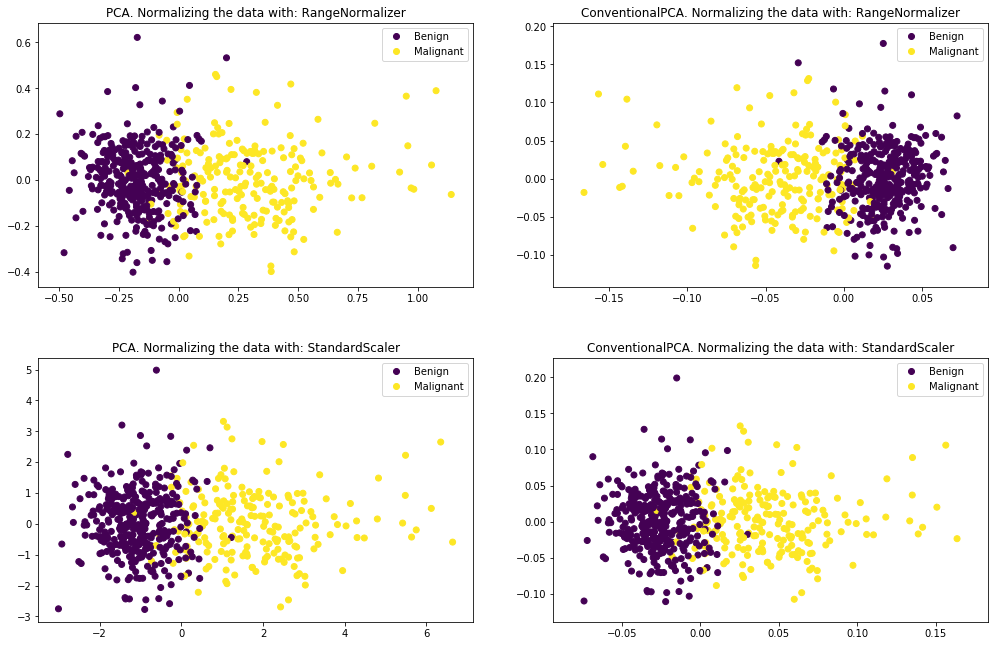

In [198]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout(pad=5)

for i, norm_class in enumerate([RangeNormalizer, StandardScaler]):
    X_normalized = norm_class().fit_transform(svd_df)
    for j, decompose_method in enumerate([PCA(n_components=2), ConventionalPCA()]):
        
        ax = axs[i, j]
#         ax.set_title("Время работы VS размер матрицы\nРазмер правой части: {}".format(b_size))
#         ax.set_xlabel("Размер матрицы")
#         ax.set_ylabel("Время (сек)")
        components = decompose_method.fit_transform(X_normalized)
        ax.set_title('{}. Normalizing the data with: {}'.format(decompose_method.__class__.__name__, norm_class().__class__.__name__))
        scatter = ax.scatter(components[:, 0], components[:, 1], c=svd_extended_df.diagnosis)
        ax.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malignant'])
plt.show()
    


# Correlation coefficient

In [200]:
import seaborn as sns

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


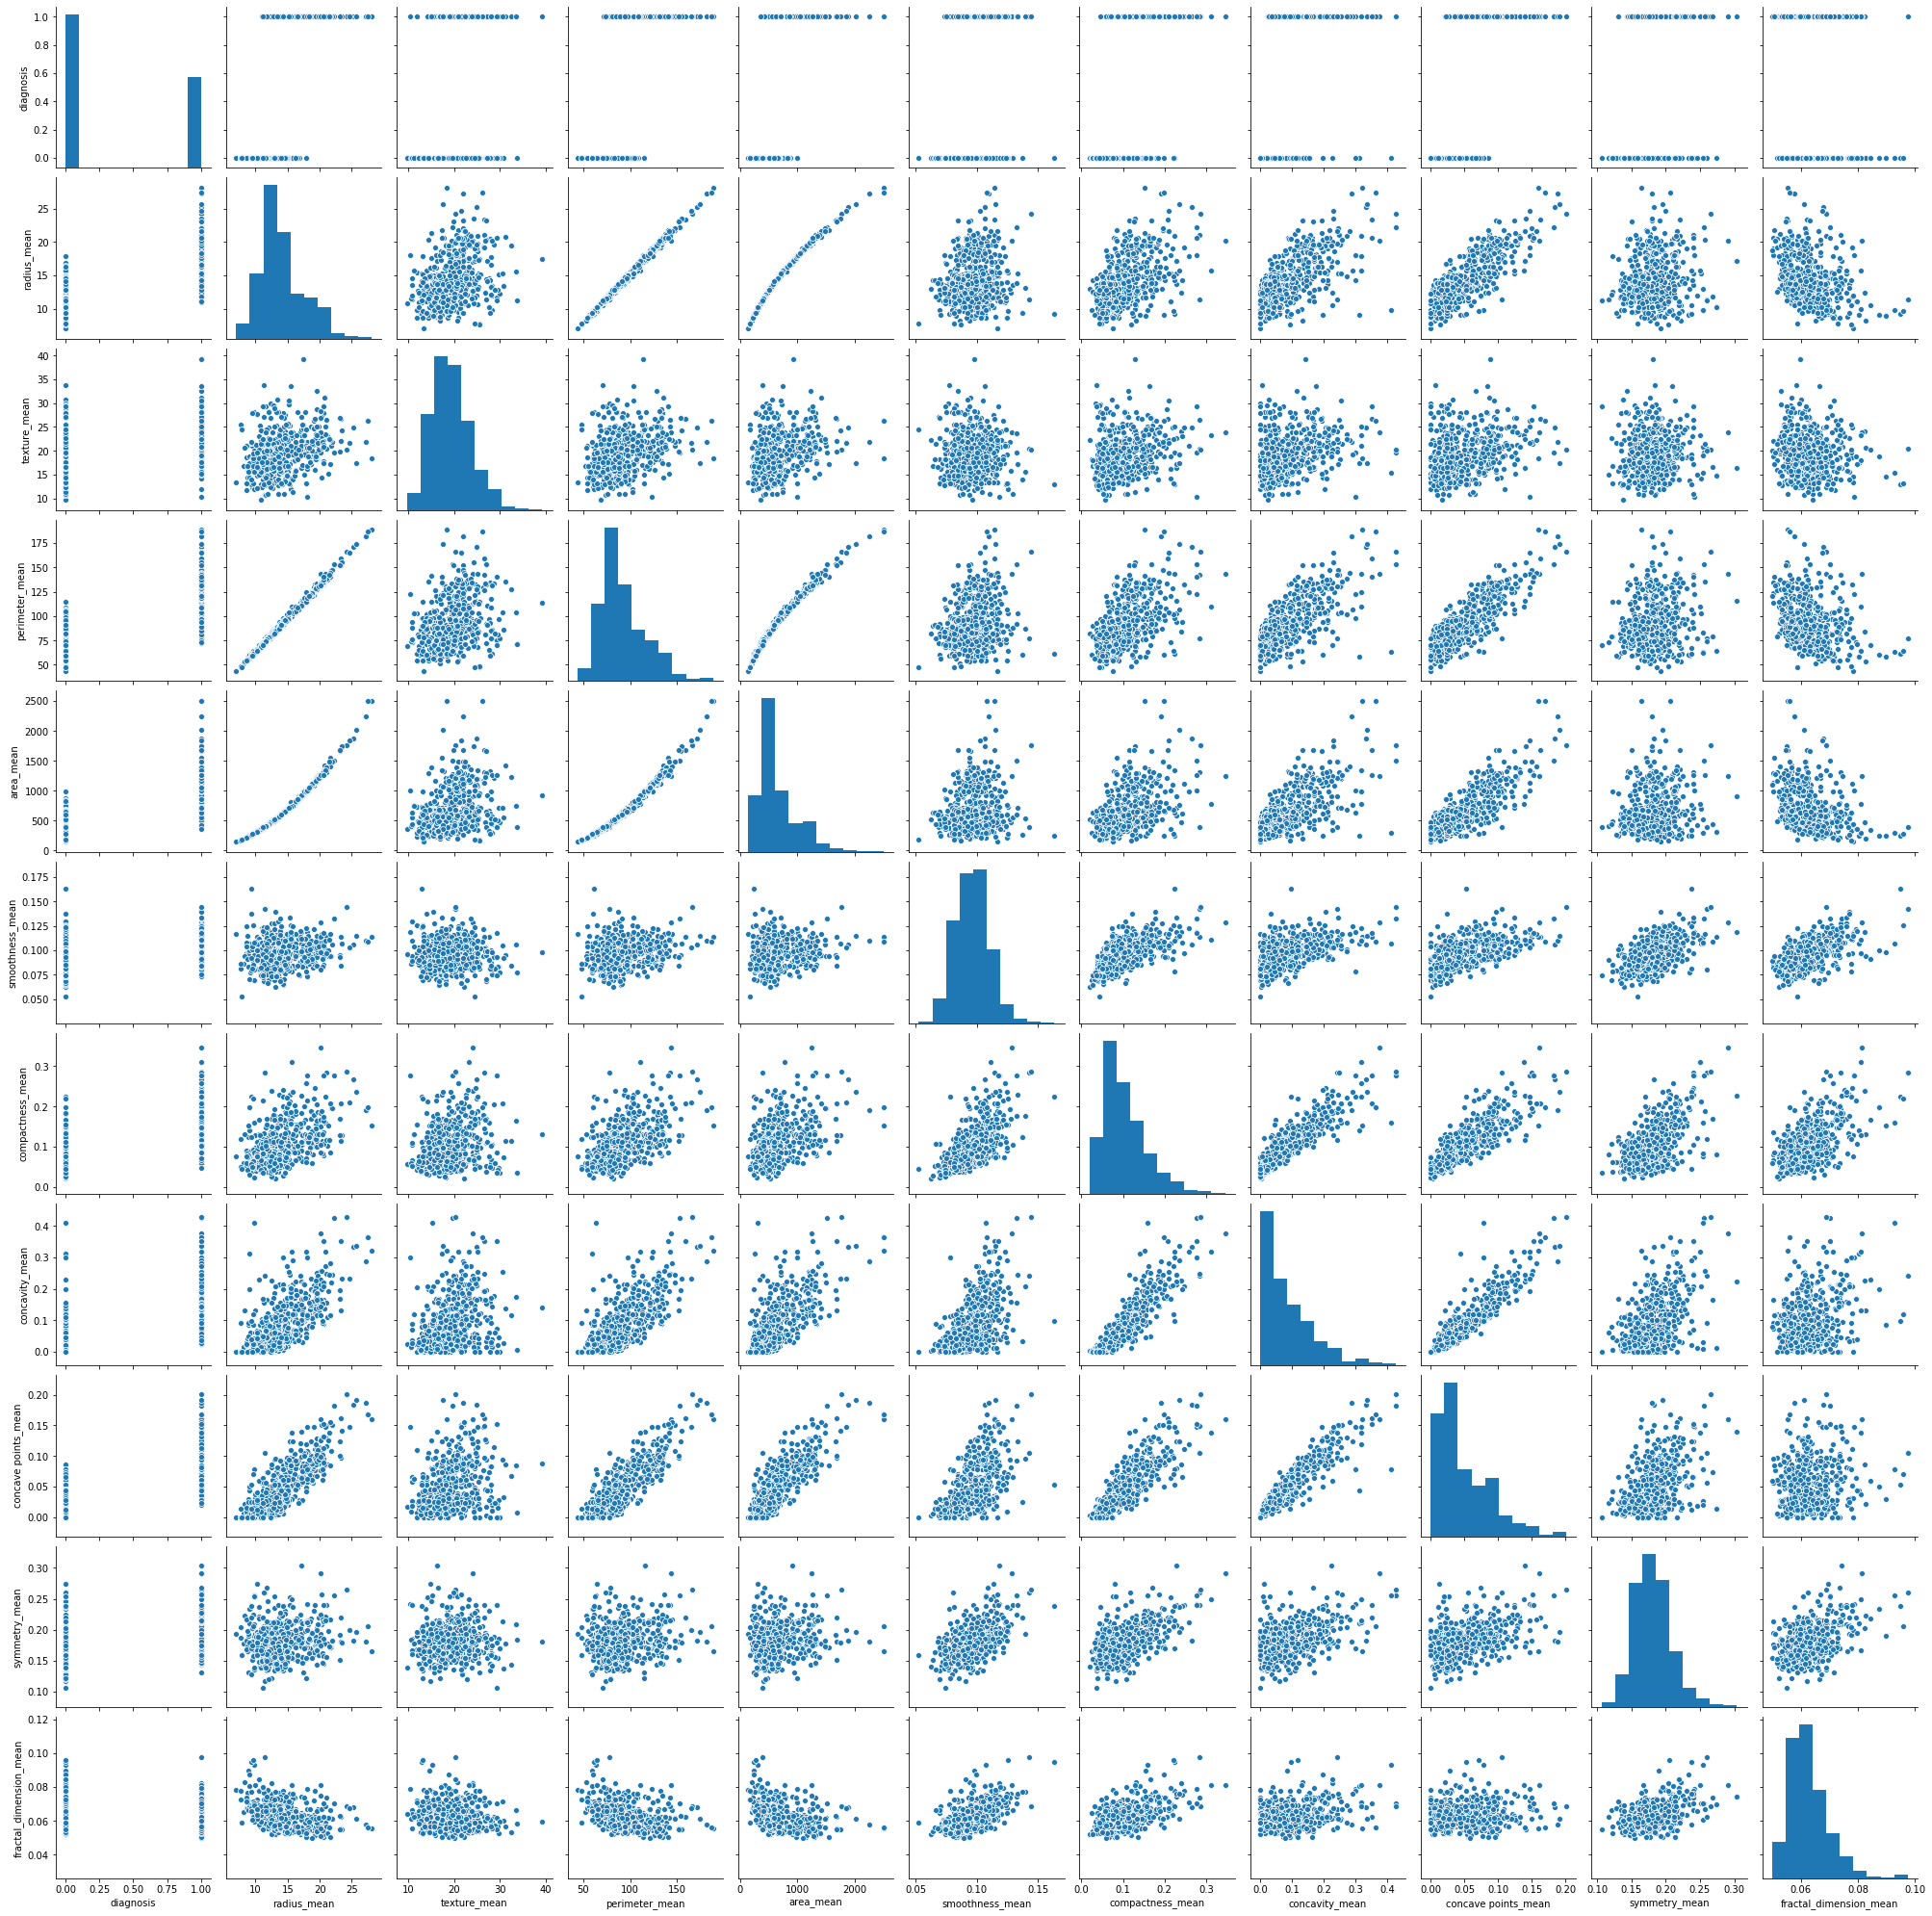

In [203]:
sns.pairplot(df.drop('id', 1))


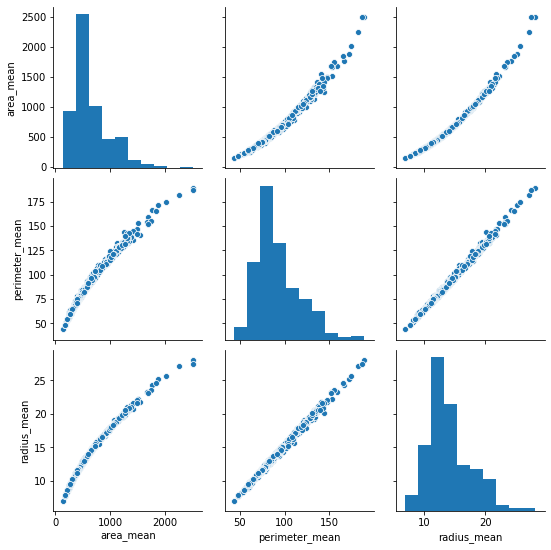

In [225]:
sns.pairplot(df[['area_mean', 'perimeter_mean', 'radius_mean']])


In [207]:
from sklearn.linear_model import LinearRegression

In [227]:
lr = LinearRegression()
X = df['radius_mean'].values.reshape(-1, 1)
y_true = df['perimeter_mean']
lr.fit(X, y_true)
y_predict  = lr.predict(df['radius_mean'].values.reshape(-1, 1))


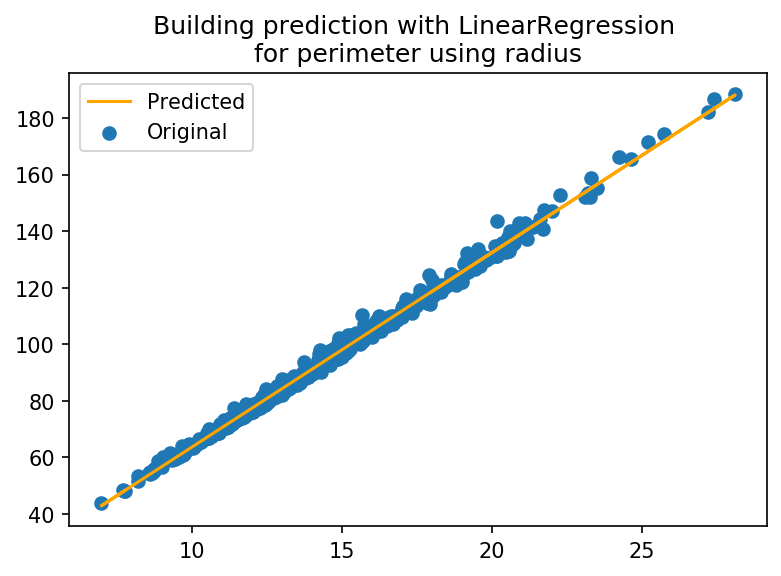

In [230]:
plt.figure(dpi=150)
plt.title('Building prediction with LinearRegression \nfor perimeter using radius')
plt.scatter(X, y_true)
plt.plot(X, y_predict, color='orange')
plt.legend(['Predicted', 'Original'])
plt.show()

In [238]:
corr_coeff = ((y_true - y_true.mean()) @ (X - X.mean()) / X.shape[0] ) / ( X.std() * y_true.std() )
det_coeff = corr_coeff ** 2
 
print('Correlation coef. = {}, determinacy coef. = {}'.format(corr_coeff[0], det_coeff[0]))

Correlation coef. = 0.9969780459119403, determinacy coef. = 0.9939652240303909


In [316]:
indices = [4, 16]
np.column_stack((y_true[indices], y_predict[indices]))


array([[135.1       , 134.37093309],
       [ 94.74      ,  95.77188746]])

In [245]:
MRAE = np.mean(np.abs(np.divide(y_true - y_predict, y_true)))
print('Mean relative absolute error = {}'.format(MRAE))


Mean relative absolute error = 0.012322313691812772
